In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 # Convergence in Probability

$X_n \xrightarrow{\mathbb{P}} X$ $\iff$ $\forall$ $\epsilon > 0$,  $\mathbb{P}(|X_n - X|>\epsilon) = p_n$  goes to $0$ as $n$ goes to $\infty$ 

We have: $\hat{p}_M = \frac{1}{M} \sum_{j=1}^M I(|X_n^{j} - X^{j}| >\epsilon)\xrightarrow{\mathbb{P}} p_n$, where $X_n^{j} - X^{j}$ are iid and with same law as  $X_n - X$, hence  $\hat{p}_M$ is unbiased (since $\mathbb{E}(\hat{p}_M) = p_n$) and weakly consistent estimator of $p_n$

We are going to illustrate this when $X=0$ is deterministic, by seing that $\hat{p}_M$ goes to $0$ as $n$ goes to $\infty$ (in probability). One can show that for a given $M$, $\hat{p}_M \xrightarrow{\mathbb{P}}0$ as $n$ goes to $\infty$)

In [2]:
def illustration_conv_prob(eps = 10**(-2), n_max = 10000, M = 1000):
    ''' Illustrates the convergence in probability to 0 of the empirical mean of iid standard normal 
     random variables
     
    eps is the precision, n_max is the numer of observations, M the numer of samples 
    '''
    ## The matrix of the realisations of iid standard normal random variables  
    mat_realisations = np.random.normal(0,1, (n_max, M))
    
    ## The matrix of mean realisations(the X_n)
    X_n = np.diag(1/np.array(list(range(1,n_max+1))))@mat_realisations.cumsum(0)
    
    ## The estimation p_hat of the probability that the empirical mean deviates from 0 of at least epsilon (eps here)
    pre_p_hat = (abs(X_n) > eps)*1
    #print(pre_p_hat.shape)
    
    p_hat = pre_p_hat.sum(1) / M
    
    #print(p_hat.shape)
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(list(range(1,n_max+1)), p_hat)
    ax[0].set_xlabel("$n$")
    ax[0].set_ylabel("$\hat{p}_M$")
    
    ## We take the last
    ax[1].plot(list(range(1, n_max+1)), X_n[:,0])
    
    if M>=3:
        ax[1].plot(list(range(1, n_max+1)), X_n[:,1])
        ax[1].plot(list(range(1, n_max+1)), X_n[:,2])
    
    ax[1].plot(list(range(1, n_max+1)), [-eps]*n_max)
    ax[1].plot(list(range(1, n_max+1)), [eps]*n_max)
    ax[1].set_xlabel("$n$")
    ax[1].set_ylabel("$X_n$")
    
    plt.show()

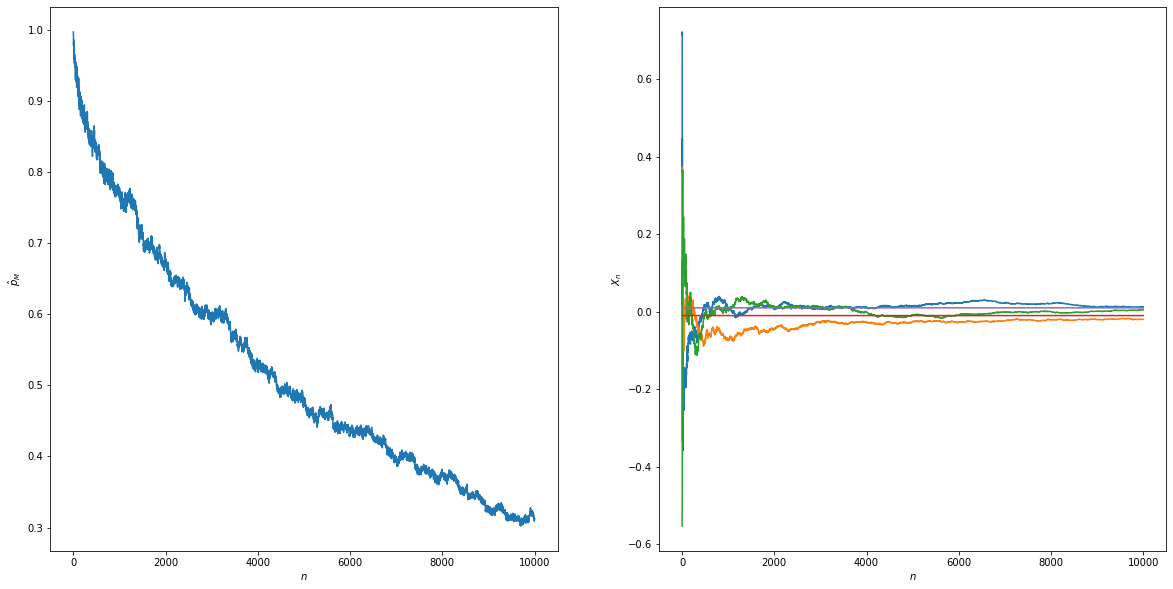

In [3]:
illustration_conv_prob()

The estimation of the probability that $X_n$ (i.e the empirical mean of iid standard normal variables here) deviates from $X$ (i.e $0$ here) goes to $0$ as $n$ goes to $\infty$.

For a given $n$, the number of realisations represented by $M$ influences the preciseness of the estimor $\hat{p}_M$: the higher $M$ is, the more precise the estimation is.

The two interpretations of convergence in probability:
$$
\text{The probability that $X_n$ deviates from $X$ of at least $\epsilon > 0$ goes to $0$ as $n$ goes to $\infty$ for all $\epsilon >0$}
$$

$$
\text{When $n$ is large enough, it becomes globally less frequent that $X_n$ deviates from $X$ of at least $\epsilon > 0$  }
$$

# Convergence almost sure

$X_n \xrightarrow{\mathbb{a.s}} X$ $\iff$ $\forall$ $\epsilon > 0$,  $\mathbb{P}(\exists k\geq n , |X_k - X|>\epsilon) = a_n$  goes to $0$ as $n$ goes to $\infty$ 

We have: $\hat{a}_M = \frac{1}{M} \sum_{j=1}^M I(\exists k\geq n, |X_k^{j} - X^{j}| >\epsilon)\xrightarrow{\mathbb{P}} a_n$, where $X_n^{j} - X^{j}$ are iid and with same law as  $X_n - X$, hence  $\hat{a}_M$ is an unbiased (since $\mathbb{E}(\hat{a}_M) = a_n$) and weakly consistent estimator of $a_n$

We are going to illustrate this when $X=0$ is deterministic, by seing that $\hat{a}_M$ goes to $0$ as $n$ goes to $\infty$ (almost surely)

In [6]:
def illustration_conv_a_s(eps = 10**(-2), n_max = 10000, M = 1000):
    ''' Illustrates the convergence in probability to 0 of the empirical mean of iid standard normal 
     random variables,
     
    eps is the precision, n_max is the numer of observations, M the numer of samples 
    '''
    ## The matrix of the realisations of iid standard normal random variables  
    mat_realisations = np.random.normal(0, 1, (n_max, M))
    
    ## The matrix of mean realisations(the X_n)
    X_n = np.diag( 1  / np.array(list(range(1,n_max+1))) ) @ mat_realisations.cumsum(0)
    
    ## The estimation p_hat of the probability that the empirical mean deviates from 0 of at least epsilon (eps here)
    pre_p_hat = (abs(X_n) > eps)*1
    
    #print(pre_p_hat.shape)
    
    
    # This matrix will help build the estimate a_hat
    ones = 1 + np.zeros((n_max, M))
    
    ## We get the columns in pre_p_hat containing 0's and the positions of the 0's 
    l1, l2 = np.where(pre_p_hat==0)
    l2, l1 = zip(*sorted(zip(l2,l1)))
    l1, l2 = list(l1), list(l2)
    
    # For convenience 
    m = pd.DataFrame(np.c_[[l1, l2]].T, columns = ["row", "col"])
    
    # keys: postition of columns containing the 0's, values: positions of the 0's in the column
    # Each value of dic is an integer
    dic = {i: list(m[m["col"]==i]["row"]) for i in list(m["col"].unique())}
    
    def getRelevantColumns(dico, N_max):
        '''
        This procedure finds the columns of pre_p_hat which have a sequence of consecutive zeros at the their "bottom".
        (e.g (1,0,0,1,0,...,0)') and gets the positions of the first and last 0's of this sequence.
        n_max is the number of rows of the matrix pre_p_hat
        '''

        list_irrelevant_col = [] #list of irrelevant columns in the sense that 0 is not their last element (at their 'bottom')
        
        for key in dico.keys():
            value = dico[key];
            begin = value[-1];
            j = -1;
            if begin == N_max-1:
                # Then the column whose number is key is relevant
                while j<len(value) and value[j-1]== value[j]-1:
                    j-=1;
                end = value[j];
                dico[key] = list(range(end, N_max))
            else:
                list_irrelevant_col.append(key)
        for key in list_irrelevant_col:
            del dico[key]
    
    getRelevantColumns(dic, n_max);
    
    position_zeros = np.array([[value, key] for key in dic.keys() for value in dic[key]]);
    # Now we have the relevant columns (columns for which the last element(s) is(are) zero(s)) of pre_p_hat
    ones[position_zeros[:,0], position_zeros[:,1]] = 0
  
    a_hat = ones.sum(1) / M
    
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(list(range(1, n_max + 1)), a_hat)
    ax[0].set_xlabel("$n$")
    ax[0].set_ylabel("$\hat{a}_M$")
    
    ## We take the last
    ax[1].plot(list(range(1, n_max+1)), X_n[:,0])
    
    
    ax[1].plot(list(range(1, n_max+1)), [-eps]*n_max)
    ax[1].plot(list(range(1, n_max+1)), [eps]*n_max)
    ax[1].set_xlabel("$n$")
    ax[1].set_ylabel("$X_n$")
    
    plt.show()

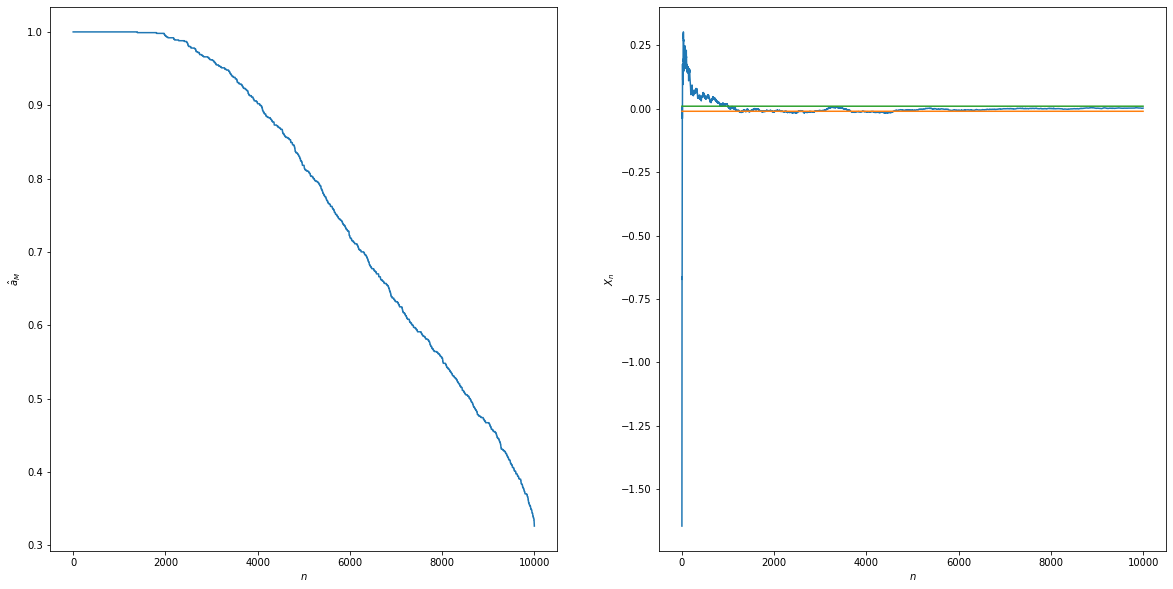

In [7]:
illustration_conv_a_s(eps = 10**(-2), n_max = 10000, M = 1000)

Interpretation of almost sure convergence:
$$
\text{The probability that there exists $k\geq n$ such that $X_k$ deviates from $X$ of at least $\epsilon > 0$ goes to $0$ as $n$ goes to $\infty$ for all $\epsilon >0$}
$$